## Notebook for Applied Statistics Project
by David O'Sullivan

#### 1. Download and save the dataset to your repository.
I found an easily downloadable file in GitHub: https://github.com/vincentarelbundock/Rdatasets/blob/master/csv/datasets/PlantGrowth.csv

In [3]:
import pandas as pd
plant_growth = pd.read_csv('PlantGrowth.csv')

plant_growth.head()

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


#### 2. Describe the data set.

This is the PlantGrowth dataset downloaded from Vincent Arel-Bundock's GitHub Page. Vincents own description of the dataset is "Results from an experiment to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions." - https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html

This is a small dataset that contains two variables; Weight and Group. There are three columns and 30 rows. The "weight" column contains numeric data ranging from 3.59 to 6.31 with a mean of 5.07. The "group" column contains categorical data. The three groups / categories are "ctr1", "trt1" and "trt2". There is 10 weights for each group, each group makes up 33.33% each.

This is a complete dataset, there are no missing values or duplicates. Even though this is a small dataset and can be checked manually, there is code below to show that no duplicates exist. Additional code below to assist in describing the dataset and checking the breakdown of categories.

In [20]:
# Get the statistical summary for the 'weight' column
weight_summary = plant_growth['weight'].describe()

weight_summary

count    30.000000
mean      5.073000
std       0.701192
min       3.590000
25%       4.550000
50%       5.155000
75%       5.530000
max       6.310000
Name: weight, dtype: float64

In [22]:
# Get a breakdown of the 'group' categories
group_counts = plant_growth['group'].value_counts()

# Get a breakdown Percentage
group_percentage = plant_growth['group'].value_counts(normalize=True) * 100

print(group_percentage)
print(group_counts)

group
ctrl    33.333333
trt1    33.333333
trt2    33.333333
Name: proportion, dtype: float64
group
ctrl    10
trt1    10
trt2    10
Name: count, dtype: int64


In [24]:
# Check for duplicates
duplicates = plant_growth.duplicated()

# Print True if any duplicates are found
print(duplicates.any())


False


#### 3. Describe what a t-test is, how it works, and what the assumptions are.

Resources (Will remove and tidy at a later time): 

https://www.youtube.com/watch?v=VekJxtk4BYM&t=29s

https://www.investopedia.com/terms/t/t-test.asp#:~:text=%25%2025%25%200%25-,What%20Is%20a%20T%2DTest%3F,flipping%20a%20coin%20100%20times.

https://www.scribbr.com/statistics/t-test/

#### What is a t-test?

"A t-test is an inferential statistic used to determine if there is a significant difference between the means of two groups and how they are related." 
- https://www.investopedia.com/terms/t/t-test.asp#:~:text=%25%2025%25%200%25-,What%20Is%20a%20T%2DTest%3F,flipping%20a%20coin%20100%20times.

There are three different types of t-tests: One sample t-test, Independent samples t-test and Paired samples t-test. 

1. One sample t-test: We use this when we want to compare the mean of a a sample to the mean of a known value.
2. Independent samples t-test: We use this test when we want to compare the means of two independent groups.
3. Paired Samples t-test: We use this to compare the measn of two dependent groups.
- https://www.youtube.com/watch?v=VekJxtk4BYM&t=29s

t-Tests are used to compare the means of two groups. If you want to compare more than two groups it is recommended to use an ANOVA test
- https://www.scribbr.com/statistics/t-test/

#### How it Works


#### What are the assumptions?




#### 4. Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

When performing a t-test on these two groups an independent t-test is the best option. We have more than one sample and the groups aren't dependent on each other. To figure out the correct syntax to perform an independent t-test I visited https://www.pythonfordatascience.org/independent-samples-t-test-python/ for some guidance.



In [7]:
import pandas as pd
import researchpy as rp 
import scipy.stats as stats

# Perform the independent t-test between 'trt1' and 'trt2'
results, summary = rp.ttest(group1= plant_growth['weight'][plant_growth['group'] == 'trt1'], 
                            group1_name= "trt1",
                            group2= plant_growth['weight'][plant_growth['group'] == 'trt2'], 
                            group2_name= "trt2")

# Print the results
print(results)
print(summary)


   Variable     N    Mean        SD        SE  95% Conf.  Interval
0      trt1  10.0  4.6610  0.793676  0.250982   4.093239  5.228761
1      trt2  10.0  5.5260  0.442573  0.139954   5.209402  5.842598
2  combined  20.0  5.0935  0.766855  0.171474   4.734601  5.452399
            Independent t-test  results
0  Difference (trt1 - trt2) =   -0.8650
1        Degrees of freedom =   18.0000
2                         t =   -3.0101
3     Two side test p value =    0.0075
4    Difference < 0 p value =    0.0038
5    Difference > 0 p value =    0.9962
6                 Cohen's d =   -1.3462
7                 Hedge's g =   -1.2893
8            Glass's delta1 =   -1.0899
9          Point-Biserial r =   -0.5786


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/researchpy/ttest.py:301: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'trt1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = group1_name
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/researchpy/ttest.py:460: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Difference (trt1 - trt2) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table2.iloc[0,0] = f"Difference ({group1_name} - {group2_name}) = "


## Results Discussion

After conducting an independent t-test it is clear to see from the results, that there is a significant difference in growth between the plants in trt1 and trt2. The first thing I did when reviewing the results was look at the difference between both means. The difference in the two means is -0.8650 which shows that on average the plants in trt1 weigh 0.865 less than those in trt2. 

After reviewing the difference in means I checekd to see if I could reject the null hypothesis. You can reject null hypothesis when the p-value is less than or equal to your significance level - https://www.indeed.com/career-advice/career-development/reject-null-hypothesis#:~:text=You%20can%20reject%20a%20null,have%20occurred%20by%20random%20chance. Significance level isn't something that is set in stone, it ranges based on the amount of risk you are willing to take. However, for this test I have decided to stick with the traditional level which is 0.05 or 5%. The data you are exploring will determine how much risk you want to take. Healthcare data is a good example of where you would have a lower significance level. If the results of your research could potentially impact someones health then you need to bring down your risk tollerance and have a significance level of 0.01 or lower. Seeing as our p-value is 0.0075 we can reject null hypothesis. 

The t-statistic is -3.0101, a larger t-statistic indicates a greater difference between the group means.

TBC....

#### 5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

Will tidy later
Getting started, intro video : https://www.youtube.com/watch?v=EWYzeZbchR0

Syntax : https://www.statsmodels.org/stable/anova.html


## Anova - Analysis of Variance

#### What is ANOVA - Analysis of Variance?

Analysis of variance tests where there are statistically significant differences between three or more groups (https://www.youtube.com/watch?v=0NwA9xxxtHw). Varience quantifies the degree of variability in a set of numbers. In the context of ANOVA variance helps us understand how much the total variability in the data is due to the differences between the groups. Before performing the analysis it is important to understand what your research question is. In this scenario with the plant_growth dataframe the questions is:

Is there a difference in weight between the different groups of the independent variable (group) with respect to the dependent variable (weight)?

We need to test to see if there is a Null hypothesis H0 or an Alternative hypothesis H1. A null hypothesis would mean that there is no difference between the means of the groups and an Alternative hypothesis would show that at least two of the group means differ from each other.

#### Breaking down the code

To conduct an ANOVA there are three steps involved which have been carried out in the code below. 

Step one is to generate a model that fits our design. This is the ols() part of our code. 'Weight' is the dependent variable and 'group' is the independent variable. The C() before group is used to indicate it's a category. Step two is to fit the data to our model and step three is to perform anova_lm() on the model.

The first output is the ANOVA table and the second is the model summary.

Run the code and we have our results! https://nicoleeic.github.io/Brain_and_Code/2019/09/02/ANOVA_new.html

In [13]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Step 1: Define the model
model = ols('weight ~ C(group)', data=plant_growth).fit()

# Step 2: Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the results
print("\nANOVA Table:")
print(anova_table)

# Step 3: Display full OLS regression summary
print("\nOLS Regression Results:")
print(model.summary())



ANOVA Table:
            sum_sq    df         F   PR(>F)
C(group)   3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN

OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     4.846
Date:                Sat, 05 Oct 2024   Prob (F-statistic):             0.0159
Time:                        10:53:33   Log-Likelihood:                -26.810
No. Observations:                  30   AIC:                             59.62
Df Residuals:                      27   BIC:                             63.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err 

#### Results Discussion

1. ANOVA Table:


2. OLS Regression Results:


#### Visualise the data :

https://nicoleeic.github.io/Brain_and_Code/2019/09/02/ANOVA_new.html

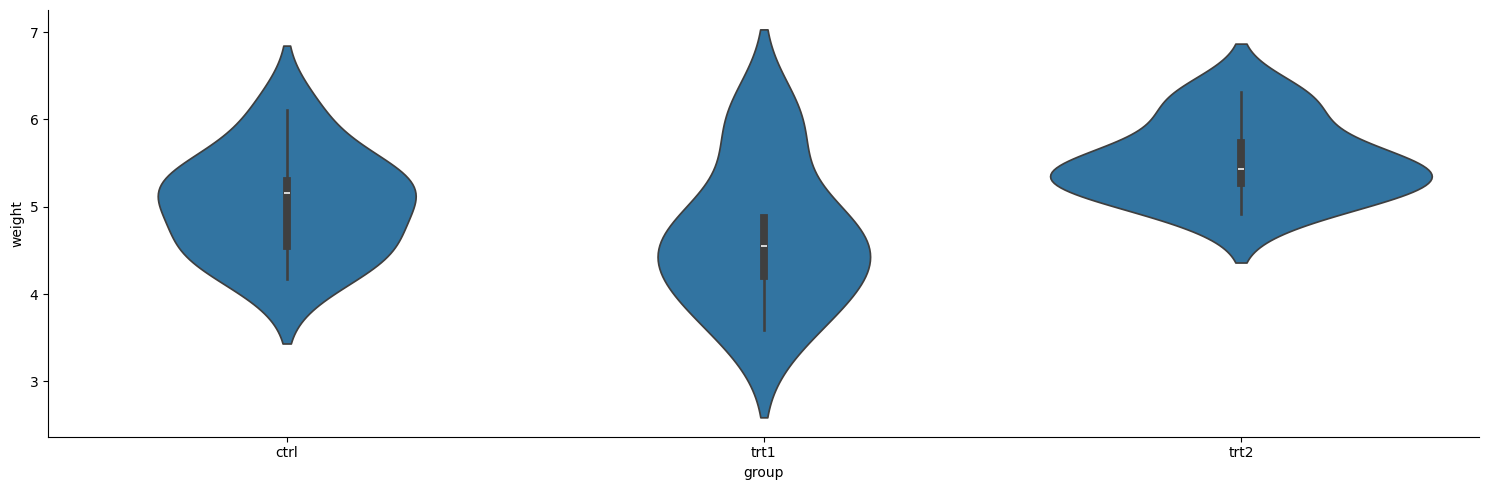

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the data using violin plot
sns.catplot(x="group", y="weight", data=plant_growth, dodge=True, kind='violin', aspect=3)

# Display the plot
plt.show()


#### 6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.